In [90]:
cd /Users/cl1704/PycharmProjects/clustering_in_rnns

/Users/cl1704/PycharmProjects/clustering_in_rnns


In [91]:
from Experiment_4.ParametricWMTask import generate_trials
from Experiment_4.datajoint_tables import *
#from Experiment_5.SiegelMillerTask import generate_trials
import networkx as nx
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from Experiment_4.net import *
import os
import statsmodels.api as sm
import scipy.optimize as opt
from scipy.stats import special_ortho_group
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import math
#from psychometrics import *
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import networkx as nx
from sklearn.cluster import KMeans
plt.rcParams["axes.grid"] = False
from sklearn.manifold import TSNE
matplotlib.rcParams['axes.linewidth'] = .5

In [92]:
def compute_var(variance,n):
    return np.sum(variance[n:])

def compute_p(k, null_k):
    return np.sum(null_k<k)/len(null_k)

In [93]:
df_list = []
for filename in os.listdir('Experiment_4/Results_4'):
    f = os.path.join('Experiment_4/Results_4', filename)
    if os.path.isfile(f):
        df_list.append(pd.read_pickle(f))
original_df = pd.concat(df_list, ignore_index=True)
original_df = original_df[original_df.mse_z < .035]
#original_df = original_df[original_df.lambda_std == 0.1]
original_df = original_df[original_df.activity_std < .1]
df = original_df.copy()
dim = 4
df = df[df.dim == dim]
df = df[df.k >= dim]
df['var'] = df.variance.apply(lambda x: compute_var(x, dim))
df['k_inertia'] = df.inertia.apply(lambda x: x[dim - 1])
df['var'] = np.log(df['var'])
df.sort_values('var', ascending=True)

,model_id,w_rec,w_in,w_out,bias,mse_z,epochs,sigma_rec,sigma_in,beta,...,lambda_std,n,lvar,dim,k,inertia,null_inertia,variance,var,k_inertia
13292,FfKc91f7,"[[0.0, 0.030532265, -0.01764336, -0.05202549, ...","[[0.052943397, 0.36661085], [0.04903817, 0.375...","[[0.029175341, 0.07392485, -0.048719734, -0.05...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.034367,1000,0.1,0.1,100.0,...,0.1,100,0.121153,4,4,"[0.9241998396500134, 0.46243746146354486, 0.22...","[[0.9946634811261239, 0.9977044095695625, 0.99...","[0.53280234, 0.28761527, 0.12631504, 0.0531793...",-9.338531,0.001441
14824,B9dgcgNo,"[[0.0, 0.03134963, -0.050945036, -0.019775076,...","[[-0.38535753, 0.37541768], [-0.36736166, -0.3...","[[0.05081474, 8.3115556e-05, 0.026681373, 0.03...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.032106,1000,0.2,0.1,100.0,...,0.1,100,0.195734,4,4,"[0.9094316817613863, 0.4814780864203189, 0.207...","[[0.9955004322864307, 0.9710756984475419, 0.99...","[0.43042895, 0.3842343, 0.09925418, 0.08598348...",-9.219819,0.001892
13316,GilspWHm,"[[0.0, 0.0127052, 0.019601561, -0.0048266463, ...","[[-0.46294767, -0.27972373], [-0.45332634, -0....","[[0.054118365, -0.056218665, 0.037717562, -0.0...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.033368,1000,0.2,0.1,100.0,...,0.1,100,0.121153,4,4,"[0.8943843333333333, 0.5685631666666666, 0.268...","[[0.995277548461631, 0.9970305704181388, 0.998...","[0.49342102, 0.34590924, 0.094296545, 0.066273...",-9.212566,0.000182
15117,k3624Lqv,"[[0.0, 0.0021397383, -0.016339656, 0.025877953...","[[-0.29195976, -0.3174029], [0.25421607, -0.32...","[[-0.00942088, 0.06117914, 0.06309196, -0.0545...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.023786,1000,0.1,0.1,100.0,...,0.1,100,0.316228,4,4,"[0.888461481410247, 0.4546247841041307, 0.1878...","[[0.9870161690044981, 0.9804965043645559, 0.98...","[0.4510602, 0.3805236, 0.10483059, 0.063458405...",-8.968847,0.004435
13001,NXMDWKAz,"[[0.0, 0.014108838, 0.011956996, -0.014206021,...","[[0.41203925, -0.06372134], [0.03205978, 0.435...","[[0.058028806, 0.008269782, 0.010915861, -0.04...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.033295,1000,0.2,0.1,100.0,...,0.1,100,0.074989,4,4,"[0.9312283333333333, 0.5039757916666666, 0.251...","[[0.9983769968357236, 0.9941276275982509, 0.98...","[0.43094498, 0.3876469, 0.11458814, 0.06669164...",-8.960513,0.000203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9168,PEaMSmIY,"[[0.0, -0.020307155, -0.0775111, -0.038600266,...","[[0.08041565, 0.029117458], [-0.099330984, -0....","[[-0.047450956, 0.023491673, 0.04612575, 0.330...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.010468,1000,0.0,0.1,100.0,...,0.1,80,-0.010000,4,8,"[0.9790245855182723, 0.9378830273038513, 0.890...","[[0.9895350187263281, 0.9830554326189195, 0.98...","[0.063752815, 0.062274136, 0.05992644, 0.05944...",-0.281572,0.856119
9158,fba6hi3O,"[[0.0, 0.02656512, -0.10198522, 0.106365755, -...","[[-0.07727818, 0.036169264], [-0.49072397, -0....","[[0.01270144, -0.064645275, 0.026990714, 0.076...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.013529,1000,0.0,0.1,100.0,...,0.1,81,-0.010000,4,8,"[0.9843272633744856, 0.9427835390946502, 0.907...","[[0.9841577999284465, 0.9919352038540428, 0.99...","[0.061905954, 0.060831714, 0.060367037, 0.0600...",-0.278543,0.873256
9160,5wb4B9u9,"[[0.0, -0.07736795, 0.033454683, -0.05066029, ...","[[0.009391626, 0.0016913008], [-0.22394793, 0....","[[0.09702336, -0.08138903, 0.11479563, -0.1709...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.009012,1000,0.0,0.1,100.0,...,0.1,81,-0.010000,4,8,"[0.9814244836856465, 0.9388122365033165, 0.898...","[[0.9855383698092334, 0.987126650312397, 0.978...","[0.06218625, 0.06142552, 0.059700977, 0.058253...",-0.276500,0.861446
9167,AIaYl2ju,"[[0.0, 0.032745387, 0.07586462, -0.005568416, ...","[[0.16879393, 0.03654218], [-0.0023797492, 0.0...","[[-0.08647686, -0.1743244, -0.040049672, -0.05.

In [94]:
ids = ['FfKc91f7','yWSKfcCh','OxJy6dh0','tHmNW4lM','qPCj8Jxk','ytCN3mPr','rwGMXdgD']

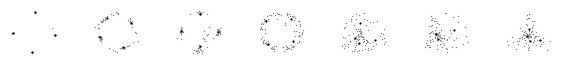

In [95]:

df_list = []
for filename in os.listdir('Experiment_4/Results_4'):
    f = os.path.join('Experiment_4/Results_4', filename)
    if os.path.isfile(f):
        df_list.append(pd.read_pickle(f))
original_df = pd.concat(df_list, ignore_index=True)
original_df = original_df[original_df.mse_z < .035]
#original_df = original_df[original_df.lambda_std == 0.1]
original_df = original_df[original_df.activity_std < .1]


fig = plt.figure(figsize=(7,.75))
gs = gridspec.GridSpec(1,7,wspace=.5)

for i in range(7):

    ax=fig.add_subplot(gs[0,i])
    model_data = original_df[original_df.model_id == ids[i]]
    net = Net(n=100,input_size = 2,dale=False,base_in=0.2)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.input_layer.bias.data = torch.tensor(0.2).float()
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    net.output_layer.bias.data = torch.tensor(-0.2).float()
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    net.sigma_rec = 0
    
    u, z, mask, conditions = generate_trials(
        n_trials=50)
    x = net(u).detach().cpu().numpy()
    
    rows = []
    for trial in range(u.shape[0]):
        rows.append({'trial': trial,
                     'theta': conditions[trial]['theta'],
                     'response': x[trial, :, :]})
    model_df = pd.DataFrame(rows)
    model_df = model_df.groupby(['theta']).response.apply(lambda r: np.mean(np.stack(r), axis=0)).reset_index()
    
    responses = np.stack(model_df.response.values)
    responses = responses.reshape(-1, responses.shape[2]).T

    pca  = PCA().fit(responses)
    x_proj = pca.transform(responses)

    lut = dict(zip(pd.Series(np.sort(labels)).unique(), network_pal))
    row_colors = pd.Series(np.sort(labels)).map(lut)
    

    sns.scatterplot(x=x_proj[:, 0], y=x_proj[:, 1], color='gray', s=1, alpha=1, ax=ax)
    
    clustering = KMeans(n_clusters=4, n_init=20).fit(responses)
    centers_proj = pca.transform(clustering.cluster_centers_)
    # 
    sns.scatterplot(x=centers_proj[:, 0], y=centers_proj[:, 1], color='k', s=2, alpha=1, ax=ax, edgecolor=None)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    total_variance = np.sum((responses.T - np.mean(responses.T, axis=0, keepdims=True)) ** 2)
    score = clustering.inertia_/total_variance
    #ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(score,4)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=6,bottom=False)
    ax.yaxis.set_tick_params(labelsize=6,left=False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    # ax.set_xlim(-30,30)
    # ax.set_ylim(-30,30)
    ax.set_aspect('equal', adjustable='box')
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_c.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)



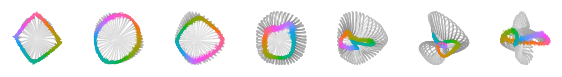

In [99]:
fig = plt.figure(figsize=(7,.75))
gs = gridspec.GridSpec(1,7,wspace=.5)
palette = sns.husl_palette(s=1,n_colors=75)
for i in range(7):

    ax=fig.add_subplot(gs[0,i])
    model_data = original_df[original_df.model_id == ids[i]]
    net = Net(n=100,input_size = 2,dale=False,base_in=0.2)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.input_layer.bias.data = torch.tensor(0.2).float()
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    net.output_layer.bias.data = torch.tensor(-0.2).float()
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    net.sigma_rec = 0
    x = net.forward(u).detach().numpy()
    x = (x - np.mean(x, axis=(0, 1), keepdims=True)) / np.std(x, axis=(0, 1), keepdims=True)
    #x = net(u)
    n_components = 2
    pca = PCA()
    pca.fit(x.reshape(-1, x.shape[2]))
    x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0], x.shape[1], x.shape[2])
    rows = []
    for k in range(u.shape[0]):
        for t in range(u.shape[1]):
            rows.append({'trial': k,
                         'theta': conditions[k]['theta'],
                         't': t,
                         'z_1': x_proj[k, t, 0],
                         'z_2': x_proj[k, t, 1], })
    new_df = pd.DataFrame(rows)
    new_df_mean = new_df.groupby(['theta', 't']).mean().reset_index()

    #palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)
   # sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=1,alpha=.1,edgecolor=None,palette = palette)
        
    palette = sns.husl_palette(n_colors = 50,s=1)
    # sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=1,alpha=1,palette = sns.blend_palette(["lightgray", "gray"], as_cmap=True),edgecolor=None)
    sns.scatterplot(data=new_df_mean,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=.75,alpha=1,palette = sns.light_palette("gray",as_cmap=True),edgecolor=None)
    sns.scatterplot(data=new_df_mean[new_df_mean.t>70],x='z_1',y='z_2',hue='theta',ax=ax,legend=False,s=2,alpha=1,palette = palette,edgecolor=None)
    sns.scatterplot(data=new_df[new_df.t>70],x='z_1',y='z_2',hue='theta',ax=ax,legend=False,s=.25,alpha=.5,palette = palette,edgecolor=None)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel("PC 1", fontsize=7)
    ax.set_ylabel("PC 2", fontsize=7)
    
    variance = np.sum(pca.explained_variance_ratio_[4:])    
    #ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=7, bottom=True)
    ax.yaxis.set_tick_params(labelsize=7, left=True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_d.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

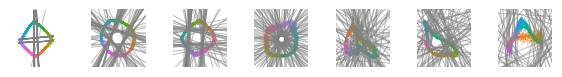

In [116]:
# HYPERPLANES
fig = plt.figure(figsize=(7,.75))
gs = gridspec.GridSpec(1,7,wspace=.5)
palette = sns.husl_palette(s=1,n_colors=75)
for col in range(7):

    ax=fig.add_subplot(gs[0,col])
    model_data = original_df[original_df.model_id == ids[col]]
    net = Net(n=100,input_size = 2,dale=False,base_in=0.2)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.input_layer.bias.data = torch.tensor(0.2).float()
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    net.output_layer.bias.data = torch.tensor(-0.2).float()
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    net.sigma_rec = 0
    
    x = net.forward(u)
    n_neurons = x.shape[2]
    #Restrict to act
  #  x = x[:,:,n_active]
    pca = PCA()
    pca.fit(x.detach().numpy().reshape(-1,x.shape[2]))
    
    U = pca.components_[:6,:].T
    #U = latent_net.module_.q[:2,:].t().detach()
    w = net.recurrent_layer.weight.data
    # w = w[n_active,:]
    # w = w[:,n_active]
    #w = w-np.eye(50)
    w_in = net.input_layer.weight.data
    
    b = net.recurrent_layer.bias.data
    
    H = w @ U 
    #H = H[sort,:]
    proj_rates = pca.transform(x.detach().reshape(-1,x.shape[2]))
    proj_rates = proj_rates.reshape(-1,75,x.shape[2])

    
    lim =15
    xx,yy = np.linspace(-lim,lim), np.linspace(-lim,lim)
    x,y = np.meshgrid(xx,yy)
    for i in range(n_neurons):
    #for i in np.argwhere(labels==0):
    
        magnitude = np.linalg.norm(H[i,:].numpy())
    
        #ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],colors=network_pal.as_hex()[labels[i]],linewidths=.75)
        ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],colors='gray',linewidths=.75,alpha=.5)
    
    #for i in range(n_neurons):
    # for i in np.argwhere(labels==0):
    # 
    #     magnitude = np.linalg.norm(H[i,:].numpy())
    # 
    #     #ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],colors=network_pal.as_hex()[labels[i]],linewidths=.75)
    #     ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],color='gray',linewidths=.75,alpha=1)
    
    
    # for i in np.argwhere(labels==1):
    # 
    #     magnitude = np.linalg.norm(H[i,:].numpy())
    # 
    #     #ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],colors=network_pal.as_hex()[labels[i]],linewidths=.75)
    #     ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],color='gray',linewidths=.75)
    
    
    # for i in range(25):
    #     ax.plot(proj_rates[i,57:,0],proj_rates[i,57:,1],lw=1)
    
    x = net.forward(u).detach().cpu().numpy()
    pca = PCA()
    pca.fit(x.reshape(-1, x.shape[2]))
    x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0], x.shape[1], x.shape[2])
    rows = []
    for k in range(u.shape[0]):
        for t in range(u.shape[1]):
            rows.append({'trial': k,
                         'theta': conditions[k]['theta'],
                         't': t,
                         'z_1': x_proj[k, t, 0],
                         'z_2': x_proj[k, t, 1], })
    new_df = pd.DataFrame(rows)
    new_df_mean = new_df.groupby(['theta', 't']).mean().reset_index()
    
    
    #sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=1,alpha=.1,edgecolor=None)
    palette = sns.husl_palette(n_colors = 50,s = 1)
    #sns.scatterplot(data=new_df_mean, x='z_1', y='z_2', ax=ax, legend=False, s=3, alpha=.5,color='gray')
    # sns.scatterplot(data=new_df_mean[new_df_mean.t==74], x='z_1', y='z_2', ax=ax, legend=False, s=10, alpha=1, hue='theta',palette=palette)
    sns.scatterplot(data=new_df_mean[new_df_mean.t>70],x='z_1',y='z_2',hue='theta',ax=ax,legend=False,s=2,alpha=1,palette = palette,edgecolor=None)
    sns.scatterplot(data=new_df[new_df.t>70],x='z_1',y='z_2',hue='theta',ax=ax,legend=False,s=.25,alpha=.5,palette = palette,edgecolor=None)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel("PC 1", fontsize=7)
    ax.set_ylabel("PC 2", fontsize=7)
    
    variance = np.sum(pca.explained_variance_ratio_[4:])    
    #ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=7, bottom=True)
    ax.yaxis.set_tick_params(labelsize=7, left=True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    new_df = new_df[new_df.t>70]
    ax.set_xlim(new_df.z_1.min()+new_df.z_1.min()/2,new_df.z_1.max()+new_df.z_1.max()/2)
    ax.set_ylim(new_df.z_2.min()+new_df.z_2.min()/2,new_df.z_2.max()+new_df.z_2.max()/2)
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_d.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

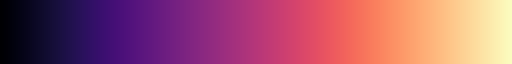

In [80]:
sns.color_palette("magma", as_cmap=True)

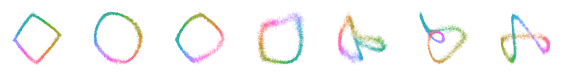

In [97]:
fig = plt.figure(figsize=(7,.75))
gs = gridspec.GridSpec(1,7,wspace=.5)
palette = sns.husl_palette(s=1,n_colors=50)
for i in range(7):

    ax=fig.add_subplot(gs[0,i])
    model_data = original_df[original_df.model_id == ids[i]]
    net = Net(n=100,input_size = 2,dale=False,base_in=0.2)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.input_layer.bias.data = torch.tensor(0.2).float()
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    net.output_layer.bias.data = torch.tensor(-0.2).float()
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    net.sigma_rec = 0.1
    x = net.forward(u).detach().numpy()
    x = (x - np.mean(x, axis=(0, 1), keepdims=True)) / np.std(x, axis=(0, 1), keepdims=True)
    #x = net(u)
    n_components = 2
    pca = PCA()
    pca.fit(x.reshape(-1, x.shape[2]))
    x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0], x.shape[1], x.shape[2])
    rows = []
    for k in range(u.shape[0]):
        for t in range(u.shape[1]):
            rows.append({'trial': k,
                         'theta': conditions[k]['theta'],
                         't': t,
                         'z_1': x_proj[k, t, 0],
                         'z_2': x_proj[k, t, 1], })
    new_df = pd.DataFrame(rows)
    new_df_mean = new_df.groupby(['theta', 't']).mean().reset_index()

    #palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)
    sns.scatterplot(data=new_df[new_df.t>72],x='z_1',y='z_2',hue='theta',ax=ax,legend=False,s=.5,alpha=.1,edgecolor=None,palette = palette)
        
    sns.scatterplot(data=new_df_mean[new_df_mean.t>72], x='z_1', y='z_2', ax=ax, legend=False, s=1, alpha=.5, hue='theta',palette = palette)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel("PC 1", fontsize=7)
    ax.set_ylabel("PC 2", fontsize=7)
    
    variance = np.sum(pca.explained_variance_ratio_[2:])    
    #ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=7, bottom=True)
    ax.yaxis.set_tick_params(labelsize=7, left=True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_d.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

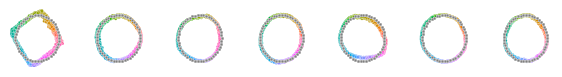

In [101]:
fig = plt.figure(figsize=(7,.75))
gs = gridspec.GridSpec(1,7,wspace=.5)
palette = sns.husl_palette(s=1,n_colors=50)
u, z, mask, conditions = generate_trials(
        n_trials=50)
for i in range(7):

    ax=fig.add_subplot(gs[0,i])
    model_data = original_df[original_df.model_id == ids[i]]
    net = Net(n=100,input_size = 2,dale=False,base_in=0.2)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.input_layer.bias.data = torch.tensor(0.2).float()
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    net.output_layer.bias.data = torch.tensor(-0.2).float()
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    net.sigma_rec = 0
    x = net.forward(u).detach().numpy()
    outputs = net.output_layer(net(u)).detach().numpy()
   # x = (x - np.mean(x, axis=(0, 1), keepdims=True)) / np.std(x, axis=(0, 1), keepdims=True)
    #x = net(u)
    n_components = 2
    pca = PCA()
    pca.fit(x.reshape(-1, x.shape[2]))
    x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0], x.shape[1], x.shape[2])
    rows = []
    for k in range(u.shape[0]):
        for t in range(u.shape[1]):
            rows.append({'trial': k,
                         'theta': conditions[k]['theta'],
                         't': t,
                         'z_1': outputs[k, t, 0],
                         'z_2': outputs[k, t, 1],
                         'target_1':z[k,t,0].item(),
                        'target_2':z[k,t,1].item()})
    new_df = pd.DataFrame(rows)
    new_df_mean = new_df.groupby(['theta', 't']).mean().reset_index()

    #palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)

    sns.scatterplot(data=new_df[new_df.t==74],x='z_1',y='z_2',ax=ax,legend=False,s=4,alpha=1,hue='theta',palette = palette)

    sns.scatterplot(data=new_df[new_df.t==74],x='target_1',y='target_2',ax=ax,legend=False,s=2,alpha=1,color='gray')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel("PC 1", fontsize=7)
    ax.set_ylabel("PC 2", fontsize=7)
    
    #variance = np.sum(pca.explained_variance_ratio_[2:])    
    #ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
    x = net.forward(u)
    mse_z = net.mse_z(x.to(device), z.to(device), mask.to(device)).detach().cpu().numpy()
    #ax.set_title(str(np.round((1-mse_z)*100,2)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=7, bottom=True)
    ax.yaxis.set_tick_params(labelsize=7, left=True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_xlim(-1.25,1.25)
    ax.set_ylim(-1.25,1.25)
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_d.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

In [12]:
original_df = pd.DataFrame(Experiment_4().fetch())
original_df = original_df[original_df.mse_z<.02]
original_df = original_df[original_df.n>=75]
df = original_df.copy()
#original_df = original_df[original_df.h_std==0.1]
#original_df = original_df[original_df.activity_std<.1]
#original_df = original_df[original_df.activity_mean<.002]


# Restrict to networks with dim and compute variance above dim
dim = 8
df = df[df.dim == dim]
df = df[df.k >= dim]
df['var'] = df.variance.apply(lambda x: compute_var(x,dim))
df['k_inertia'] = df.inertia.apply(lambda x: x[dim-1])
df['var'] = np.log(df['var'])
df[df['var']>-10].sort_values('var',ascending=True)


,model_id,n,lvar,dim,lr,beta,w_rec,w_in,w_out,bias,mse_z,lambda_std,epochs,k,inertia,null_inertia,variance,var,k_inertia
46,UbE7xXq4,100,-0.001000,8,0.001,2.0,"[[0.0, 0.018132593, 0.063940585, -0.024242485,...","[[0.4232253, -0.3445637], [-0.071193494, -0.39...","[[-0.02305555, 0.063113004, -0.10160151, -0.08...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.014586,0.1,1000,13,"[0.89660225, 0.5283268333333333, 0.30839645833...","[[0.9852584926290681, 0.9898449025554483], [0....","[0.44929022, 0.3997088, 0.09667477, 0.01669037...",-5.848212,0.079468
27,m1pAlYEI,100,0.074989,8,0.001,2.0,"[[0.0, -0.07207911, -0.035884004, -0.001992820...","[[0.030093292, -0.39275], [-0.13305934, 0.2259...","[[0.04436445, 0.09093583, 0.053923808, -0.0902...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.013542,0.1,1000,13,"[0.9020609085050757, 0.47546708128892345, 0.28...","[[0.9937753108330912, 0.9969528767887048], [0....","[0.49340904, 0.35062522, 0.09779902, 0.0182429...",-5.813040,0.075051
26,LlYGb86K,99,0.046416,8,0.001,2.0,"[[0.0, 0.06893572, -0.054018367, 0.08213256, 0...","[[0.35695985, 0.3361191], [0.071191944, 0.0786...","[[-0.041165754, -0.029734997, 0.061652508, -0....","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.012606,0.1,1000,13,"[0.8990439478919235, 0.5252635921495293, 0.325...","[[0.9951054284515887, 0.9796482151919323], [0....","[0.45825118, 0.38309345, 0.098718174, 0.022363...",-5.795267,0.075023
15,f0X5XQqq,100,-0.001000,8,0.001,2.0,"[[0.0, -0.04123988, -0.026159022, -0.024242576...","[[0.19826013, -0.40715426], [0.0033637353, -0....","[[0.068445094, 0.026414806, -0.029225957, 0.04...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.016192,0.1,1000,13,"[0.8997055749754646, 0.581725215143768, 0.3119...","[[0.9988893217442206, 0.9495283951967579], [0....","[0.44077814, 0.391843, 0.099914245, 0.02576920...",-5.697118,0.087878
38,qAjZ6KUc,100,0.001000,8,0.001,2.0,"[[0.0, 0.086962245, 0.04822864, -0.0794418, -0...","[[-0.44104838, 0.2245691], [-0.43123344, 0.362...","[[-0.010778826, -0.084782094, -0.00084020436, ...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.011847,0.1,1000,13,"[0.911353, 0.5390125833333334, 0.3190554791666...","[[0.993980429106577, 0.9913160899366429], [0.7...","[0.45149577, 0.39348382, 0.08855221, 0.0206188...",-5.593448,0.088820
17,gunTiZhf,100,-0.003162,8,0.001,2.0,"[[0.0, 0.09885001, 0.036928523, -0.04848563, -...","[[-0.19981861, -0.1969952], [0.18084526, 0.045...","[[-0.032412432, 0.09720967, -0.03658375, -0.01...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.013117,0.1,1000,13,"[0.9037557580203535, 0.4627704197691317, 0.291...","[[0.9959901316346691, 0.9896954778656777], [0....","[0.50968343, 0.32325554, 0.09466747, 0.0298713...",-5.469556,0.086250
4,5gtLim6x,100,-0.001778,8,0.001,2.0,"[[0.0, 0.033362567, 0.023915716, 0.03841562, -...","[[0.24431862, 0.15211046], [0.33815864, 0.0818...","[[0.043127548, 0.10458988, 0.09546942, 0.00851...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.012350,0.1,1000,13,"[0.8835983972663995, 0.5077188346198057, 0.306...","[[0.9801015789199999, 0.996559756242035], [0.7...","[0.44335547, 0.35525173, 0.11561828, 0.0355493...",-5.455598,0.109355
32,NTn2af8N,99,-0.005623,8,0.001,2.0,"[[0.0, 0.01018198, 0.01781495, 0.033833787, -0...","[[0.26334628, -0.043907207], [-0.35758123, -0....","[[-0.028229883, -0.035602555, 0.06189896, 0.05...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.011735,0.1,1000,13,"[0.886635334450393, 0.5648742954333831, 0.3317...","[[0.9991657907830881, 0.9932857959686271], [0....","[0.42021486, 0.38288143, 0.109743275, 0.037548...",-5.447609,0.131939
28,mFMmdmxL,100,-0.031623,8,0.001,2.0,"[[0.0, 0.091802604, -0.07272764, 0.042642906, ...","[[0.301676, 0.14898483], [-0.28502, -0.3520243...","[[-0.038772147, 0.08993599, 0.019338045, -0.01...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...",0.013536,0.1,1000,13,"[0.8827659706914927, 0.5082748354020422, 0.313...","[[0.9955098414442509, 0.98967

In [13]:
## RESPONSE MATRIX

model_data = original_df[original_df.model_id=='UbE7xXq4']
net = Net(n=100,input_size = 2,dale=False)
net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
net.input_layer.bias.data = torch.tensor(0.2)
net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
net.output_layer.bias.data = torch.tensor(-0.2)
net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
net.sigma_in = 0.1
net.sigma_rec = 0

u, z, mask, conditions  = generate_trials(
                            n_trials=100)
x = net(u).detach().cpu().numpy()


# Response matrix
rows = []
for k in range(u.shape[0]):
    rows.append({'trial': k,
                 'theta': conditions[k]['theta'],
                 'response': x[k, :, :]})
df = pd.DataFrame(rows)

df = df.groupby('theta').response.apply(lambda r: np.mean(np.stack(r), axis=0)).reset_index()
responses = np.stack(df.response.values)
responses = responses.reshape(-1, responses.shape[2]).T

# z_score
responses = (responses - np.mean(responses, axis=1, keepdims=True)) / np.std(responses, axis=1, keepdims=True)
responses = responses[~np.isnan(responses).any(axis=1)]


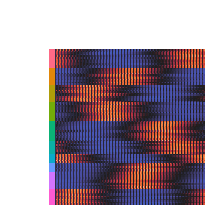

In [14]:
## CLUSTERED RESPONSE MATRIX        
#_,k = compute_k(responses,5,25,.05)
k = model_data.k.values[0]

clustering = KMeans(n_clusters=10,n_init=20).fit(responses)
labels  = clustering.labels_
sort = np.argsort(labels)
sorted_responses = responses[sort,:]
sns.husl_palette(s=.4)
network_pal = sns.husl_palette(pd.Series(np.sort(labels)).unique().size,s=1)
lut = dict(zip(pd.Series(np.sort(labels)).unique(),network_pal))
row_colors = pd.Series(np.sort(labels)).map(lut)
g = sns.clustermap(pd.DataFrame((sorted_responses)),row_cluster=False, col_cluster=False, row_colors=row_colors,figsize=(2.25,2.25),cbar_pos=None, xticklabels=False, yticklabels=False,center=0)
ax = g.ax_heatmap

g.savefig('Figures/Fig_2afc_b.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

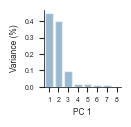

In [20]:
## PCA
fig = plt.figure(figsize=(1,1))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])
pca = PCA().fit(responses.T)
sns.barplot(x = np.arange(1,9),y=pca.explained_variance_ratio_[:8],alpha=.5,ax=ax)
ax.set_xlabel("PC 1", fontsize=6)
ax.set_ylabel("Variance (%)", fontsize=6)
#ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
ax.xaxis.set_tick_params(labelsize=5, bottom=True)
ax.yaxis.set_tick_params(labelsize=5, left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('Figures/Fig1c.jpg',
            format='jpeg',
            dpi=450,
            bbox_inches='tight'
            )

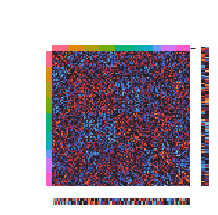

In [15]:
## RECURRENT MATRIX

sort=np.argsort(labels)
w = net.recurrent_layer.weight.data
w_in = net.input_layer.weight.data
w_out = net.output_layer.weight.data

w = w[sort,:]
w = w[:,sort]
w_in = w_in[sort,:]
w_out = w_out[:,sort]

g = sns.clustermap(pd.DataFrame(w),center=0,row_cluster=False, col_cluster=False, row_colors=row_colors, col_colors=row_colors,figsize=(2.25,2.25),cbar_pos=None, xticklabels=False, yticklabels=False)

g.gs.update(left=0.05, right=0.85,bottom=.15)
gs2 = matplotlib.gridspec.GridSpec(1,1, left=.9,top=.77,bottom=.15)
ax2 = g.fig.add_subplot(gs2[0])
sns.heatmap(w_in,ax=ax2,cbar=False,xticklabels=False,yticklabels=False,center=0)

gs3 = matplotlib.gridspec.GridSpec(1,1,left=.24,top=.1,right=.85)
ax3 = g.fig.add_subplot(gs3[0])
sns.heatmap(w_out,ax=ax3,cbar=False,xticklabels=False,yticklabels=False,center=0)


g.savefig('Figures/Fig_2afc_c.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

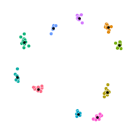

In [16]:
## LDA

clf = LinearDiscriminantAnalysis()
clf.fit(responses, labels)
x_proj = clf.transform(responses)


lut = dict(zip(pd.Series(np.sort(labels)).unique(),network_pal))
row_colors = pd.Series(np.sort(labels)).map(lut)

fig = plt.figure(figsize=(1.5,1.5))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])
sns.scatterplot(x=x_proj[np.argsort(labels), 0], y=x_proj[np.argsort(labels), 1], color=row_colors,s=6,alpha=1,ax=ax)

centers_proj = clf.transform(clustering.cluster_centers_)
    
sns.scatterplot(x=centers_proj[:, 0], y=centers_proj[:, 1], color='k',s=3,alpha=1,ax=ax,edgecolor=None)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(labelsize=8,bottom=True)
ax.yaxis.set_tick_params(labelsize=8,left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
# ax.set_xlim(-30,30)
# ax.set_ylim(-30,30)
plt.savefig('Figures/Fig1c.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

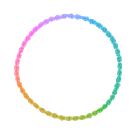

In [17]:

#palette = sns.color_palette("coolwarm", n_colors=50,as_cmap=False)
palette = sns.husl_palette(50,s=1)



net.sigma_in =0.02
net.sigma_rec =0
x = net.forward(u).detach().numpy()
x = (x-np.mean(x,axis=(0,1),keepdims=True)) / np.std(x,axis=(0,1),keepdims=True)
#x = net(u)
n_components=2
pca = PCA()
pca.fit(x.reshape(-1, x.shape[2]))
x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0],x.shape[1],x.shape[2])
rows = []
for k in range(u.shape[0]):
    for t in range(u.shape[1]):
        rows.append({'trial':k,
                     'theta':conditions[k]['theta'],
                    't':t,
                    'z_1':x_proj[k,t,0],
                    'z_2':x_proj[k,t,1],})
new_df = pd.DataFrame(rows)
new_df_mean =new_df.groupby(['theta','t']).mean().reset_index()
fig = plt.figure(figsize=(1.5,1.5))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])


sns.scatterplot(data=new_df[new_df.t==74],x='z_1',y='z_2',ax=ax,legend=False,s=3,alpha=.5,hue='theta',palette = palette)
# sns.scatterplot(data=new_df_mean[new_df_mean.t==74],x='z_1',y='z_2',ax=ax,legend=False,s=6,alpha=1,hue='theta',palette=palette)

# Model predictions



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("PC 1",fontsize=7)
ax.set_ylabel("PC 2",fontsize=7)
#ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
ax.xaxis.set_tick_params(labelsize=7,bottom=True)
ax.yaxis.set_tick_params(labelsize=7,left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.gca().patch.set_alpha(0)
# ax.set_xlim(-1.25,1.25)
# ax.set_ylim(-1.25,1.25)
matplotlib.rcParams['savefig.transparent'] = True
fig.savefig('Figures/Exp_2_Fig_1.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight',transparent=True)


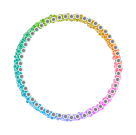

In [18]:
u, z, mask, conditions  = generate_trials(
                            n_trials=50)
net.sigma_in =0.05
net.activation = torch.nn.Softplus(beta=2)
net.sigma_rec = 0

x = net(u)
output = net.output_layer(x).detach().numpy()
rows = []
for k in range(u.shape[0]):
    for t in range(u.shape[1]):
        rows.append({'trial':k,
                     'theta':conditions[k]['theta'],
                    't':t,
                    'z_1':output[k,t,0].item(),
                    'z_2':output[k,t,1].item(),
                     'target_1':z[k,t,0].item(),
                    'target_2':z[k,t,1].item(),})
new_df = pd.DataFrame(rows)
new_df_mean =new_df.groupby(['theta','t']).mean().reset_index()
fig = plt.figure(figsize=(1.5,1.5))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])



sns.scatterplot(data=new_df[new_df.t==74],x='z_1',y='z_2',ax=ax,legend=False,s=6,alpha=1,hue='theta',palette = palette)

sns.scatterplot(data=new_df[new_df.t==74],x='target_1',y='target_2',ax=ax,legend=False,s=6,alpha=1,color='gray')

# Plot targets



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("PC 1",fontsize=7)
ax.set_ylabel("PC 2",fontsize=7)
#ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
ax.xaxis.set_tick_params(labelsize=7,bottom=True)
ax.yaxis.set_tick_params(labelsize=7,left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]


fig.savefig('Figures/Exp_2_Fig_2.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight')
